## TME 4

In [1]:
from arftools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import os
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report

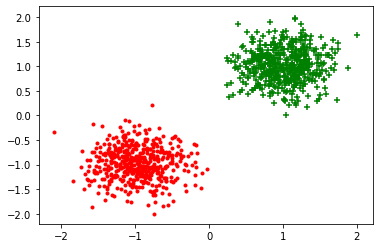

In [2]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=0.1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=0.1)
plot_data(trainx,trainy)
plt.show()

## Données linéairement séparables

In [3]:
def plot_frontiere_proba(data,datay, f, step=20):
    grid, x, y = make_grid(data=data, step=step)
    plt.contourf(x, y, f(grid).reshape(x.shape), 255)
    plot_data(data,datay)
    plt.show()

Kernel: linear, C: 0.01, gamma: 0.01, score:1.0


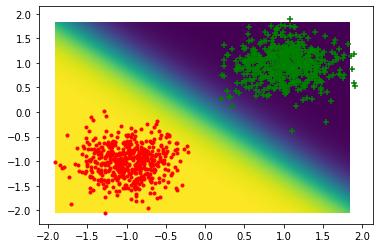

Kernel: linear, C: 0.01, gamma: 0.1, score:1.0


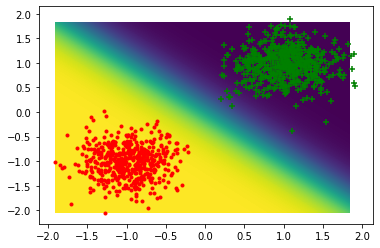

Kernel: linear, C: 0.1, gamma: 0.01, score:1.0


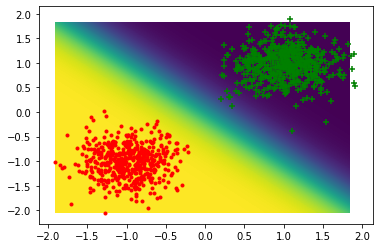

Kernel: linear, C: 0.1, gamma: 0.1, score:1.0


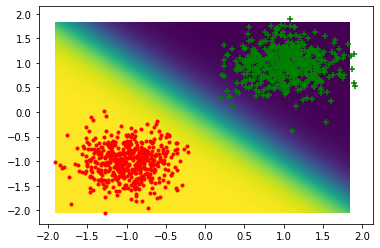

Kernel: rbf, C: 0.01, gamma: 0.01, score:1.0


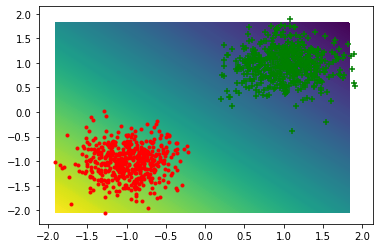

Kernel: rbf, C: 0.01, gamma: 0.1, score:1.0


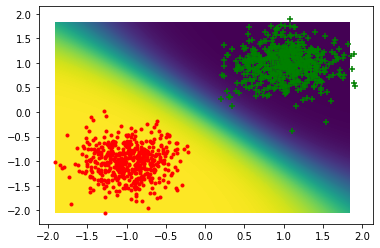

Kernel: rbf, C: 0.1, gamma: 0.01, score:1.0


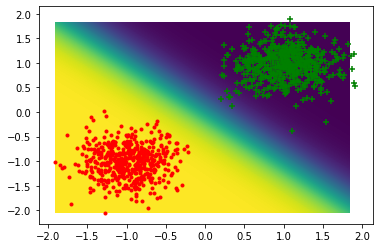

Kernel: rbf, C: 0.1, gamma: 0.1, score:1.0


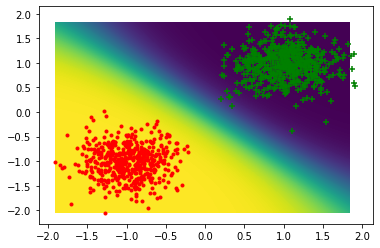

Kernel: sigmoid, C: 0.01, gamma: 0.01, score:1.0


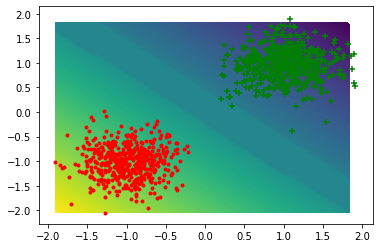

Kernel: sigmoid, C: 0.01, gamma: 0.1, score:1.0


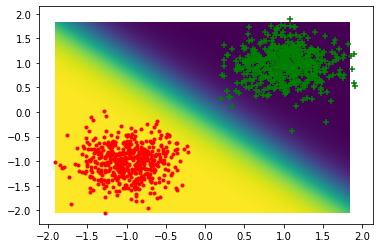

Kernel: sigmoid, C: 0.1, gamma: 0.01, score:1.0


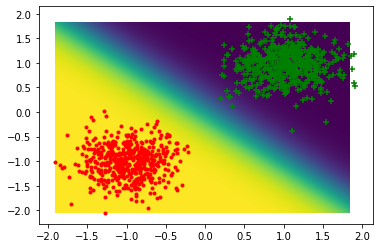

Kernel: sigmoid, C: 0.1, gamma: 0.1, score:1.0


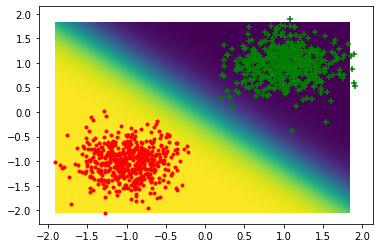

In [5]:
arrayKernels = ['linear','rbf','sigmoid']
arrayC = [0.01, 0.1]
arrayGamma = [0.01,0.1]
def plot_frontiere_proba(data,datay, f, step=20):
    grid, x, y = make_grid(data=data, step=step)
    plt.contourf(x, y, f(grid).reshape(x.shape), 255)
    plot_data(data,datay)
    plt.show()

for ker in arrayKernels:
    for paramC in arrayC:  
        for g in arrayGamma:
            svm = SVC(C=paramC,kernel=ker,gamma=g,probability=True)
            svm.fit(trainx,trainy)
            score = svm.score(testx,testy)
            print("Kernel: {}, C: {}, gamma: {}, score:{}".format(ker,paramC,g,score))
            plot_frontiere_proba(testx, testy, lambda x : svm.predict_proba(x)[:,0],step=50)
        
            

## Données XOR

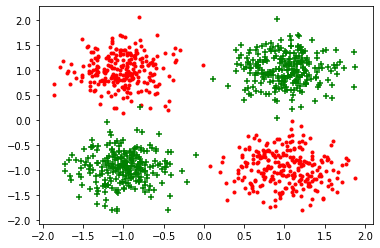

In [36]:
e = 0.02
trainx,trainy = gen_arti(nbex=1000,data_type=1,epsilon=e)
testx,testy =  gen_arti(nbex=1000,data_type=1,epsilon=e)
plot_data(trainx,trainy)
plt.show()   

In [38]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1,10,100], 'gamma':[0.1,1,10,100]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(trainx,trainy)
scores = ['precision', 'recall']
for score in scores:
    clf = GridSearchCV(SVC(), parameters, scoring='%s_macro' % score)
    clf.fit(trainx, trainy)
    print("Métrique: {}, meilleur score obtenu: {} avec les paramètres: {}".format(score,clf.best_score_,clf.best_params_))

Métrique: precision, meilleur score obtenu: 0.9990099009900991 avec les paramètres: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Métrique: recall, meilleur score obtenu: 0.999 avec les paramètres: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


Kernel: rbf, C: 0.1, gamma: 0.1, score:1.0


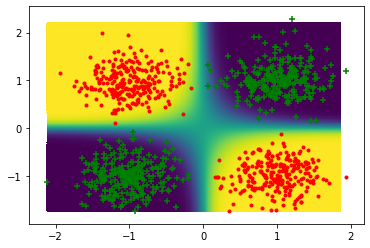

In [40]:
svm = SVC(C=clf.best_params_["C"],gamma=clf.best_params_["gamma"],kernel=clf.best_params_["kernel"],probability=True)
svm.fit(trainx,trainy)
score = svm.score(testx,testy)
print("Kernel: {}, C: {}, gamma: {}, score:{}".format(clf.best_params_["kernel"],
clf.best_params_["C"],clf.best_params_["gamma"],score))
plot_frontiere_proba(testx, testy, lambda x : svm.predict_proba(x)[:,0],step=50)

## Données USPS

In [30]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

def plot_error(datax,datay,f,step=10):
    grid,x1list,x2list=make_grid(xmin=-4,xmax=4,ymin=-4,ymax=4)
    plt.contourf(x1list,x2list,np.array([f(datax,datay,w) for w in grid]).reshape(x1list.shape),25)
    plt.colorbar()
    plt.show()


def getTwoTrainTestUsps(datax,datay,number1,number2):
    where1 = np.where(datay == number1)[0]
    where2 = np.where(datay == number2)[0]
    train1 = datax[where1]
    train2 = datax[where2]
    label1 = np.array([1 for i in range(len(where1))])
    label2 = np.array([-1 for i in range(len(where2))])
    trainx = np.append(train1, train2, axis=0)
    trainy = np.append(label1, label2, axis=0)
    c = list(zip(trainx, trainy))
    np.random.shuffle(c)
    trainx, trainy = zip(*c)
    trainx = np.array(trainx)
    trainy = np.array(trainy)
    return trainx, trainy

def transformeData(data):
    return np.array([[1,x,y,x**2,y**2,x*y] for x,y in data])

In [41]:
datax, datay = load_usps("USPS/usps_train.txt")
trainx, trainy = getTwoTrainTestUsps(datax,datay,3,1)
dataxTest, datayTest = load_usps("USPS/usps_test.txt")
testx,testy = getTwoTrainTestUsps(dataxTest,datayTest,3,1)

In [42]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1,10], 'gamma':[1,10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(trainx,trainy)
scores = ['precision', 'recall']
for score in scores:
    clf = GridSearchCV(SVC(), parameters, scoring='%s_macro' % score)
    clf.fit(trainx, trainy)
    print("Métrique: {}, meilleur score obtenu: {} avec les paramètres: {}".format(score,clf.best_score_,clf.best_params_))

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

Métrique: precision, meilleur score obtenu: 0.9987530707958013 avec les paramètres: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Métrique: recall, meilleur score obtenu: 0.9987391287835632 avec les paramètres: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [44]:
svm = SVC(C=clf.best_params_["C"],gamma=clf.best_params_["gamma"],kernel=clf.best_params_["kernel"],probability=True)
svm.fit(trainx,trainy)
score = svm.score(testx,testy)
print("Kernel: {}, C: {}, gamma: {}, score:{}".format(clf.best_params_["kernel"],
clf.best_params_["C"],clf.best_params_["gamma"],score))

Kernel: linear, C: 1, gamma: 1, score:0.9906976744186047
